<center><img src="Fig/UGA.png" width="30%" height="30%"></center>
<center><h3>Master of Science in Industrial and Applied Mathematics (MSIAM)  -- 1st year</h3></center>
<hr>
<center><h1>Numerical Optimization</h1></center>
<center><h2>Lab 3: Projected Gradient</h2></center>

In [ ]:
%load_ext autoreload
%autoreload 2

---

# 1. Projected gradient algorithms on a simple function


For minimizing a differentiable function $f:\mathbb{R}^n \to \mathbb{R}$, given:
* the function to minimize `f`
* a 1st order oracle `f_grad` (see `problem1.ipynb` for instance)
* an initialization point `x0`
* the sought precision `PREC` 
* a maximal number of iterations `ITE_MAX` 


these algorithms perform iterations of the form
$$ x_{k+1} = P\left(x_k - \gamma_k \nabla f(x_k)\right) $$
where $\gamma_k$ is a stepsize to choose and $P$ is the projector onto the convex constraint set. We only consider positivity and interval constraints.


We begin by investigating <a href="#pb21">Problem 21</a>

> Observe the 3D and level plots of the function.

In [ ]:
import problem21 as pb21

In [ ]:
from plotLib import *
%matplotlib inline

custom_3dplot( pb21.f, pb21.x1_min,pb21.x1_max,pb21.x2_min,pb21.x2_max,pb21.nb_points, pb21.vmin, pb21.vmax )
level_plot( pb21.f, pb21.x1_min,pb21.x1_max,pb21.x2_min,pb21.x2_max,pb21.nb_points, pb21.levels , pb21.title )

### 1.a. simple projected gradient algorithm for positivIty constraints

> Examine the functions and variables defined in `problem1.py` <br/>
> Complete the function `positivity_gradient_algorithm` as asked in `algoProjGradient.py` <br/>
> Examine and run the cells below. Notably change the step size `step` and observe the different behaviors of the algorithm.

In [ ]:
from algoProjGradient import *  # import all methods of the module into the current environment

import problem1 as pb1


import numpy as np

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.001                     # Sought precision
ITE_MAX = 20                       # Max number of iterations
x0      = np.array( (2.0,2.0 ) )   # Initial point
step    = 1.1/pb1.L                # Stepsize 1.5/pb21.L


##### Projected Gradient algorithm


x,x_tab = positivity_gradient_algorithm(pb1.f , pb1.f_grad , x0 , step , PREC , ITE_MAX )


##### Plotting

The following cell plots the iterates over the level sets of the minimized function.

In [ ]:
from plotLib import *
%matplotlib inline

level_points_plot( pb1.f , x_tab , pb1.x1_min,pb1.x1_max,pb1.x2_min,pb1.x2_max,pb1.nb_points, pb1.levels , pb1.title )

### 1.b. simple projected gradient algorithm for interval  constraints


> Complete the function `interval_gradient_algorithm` as asked in `algoProjGradient.py` <br/>
> Examine and run the cells below. Notably change the step size `step` and observe the different behaviors of the algorithm.
> <br/>
> Change also the interval bounds. Consider various interval  bounds [a, b], such that the minimum is within the bounds, or outside of the bounds, or a component is inside whereas the other is not.

In [ ]:
from algoProjGradient import *  # import all methods of the module into the current environment

import problem1 as pb1

import numpy as np

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 20                       # Max number of iterations
a = np.array( (-4,-3.0 ) )   # inf bounds np.array( (-2,-2.0 ) )
b = np.array( (0.0,3.0 ) )   # sup bounds  np.array( (3.0,3.0 ) )
# the interval constraints are a <= x <= b
x0      = np.array( (-4.0,-3.0 ) )   # Initial point
step    = 0.75/pb1.L                # Stepsize 


##### Projected Gradient algorithm


x,x_tab = interval_gradient_algorithm(pb1.f , pb1.f_grad , x0 , a , b , step , PREC , ITE_MAX )


##### Plotting

The following cell plots the iterates over the level sets of the minimized function.

In [ ]:
from plotLib import *
%matplotlib inline

level_points_plot( pb1.f , x_tab , pb1.x1_min,pb1.x1_max,pb1.x2_min,pb1.x2_max,pb1.nb_points, pb1.levels , pb1.title )

---
# 2. More involved functions

Now, we investigate other functions and examine the behavior of gradient algorithms in these cases.

### 2.a  Shaper functions

<a href="#pb3">Problem 2</a> features a sharper function. 


In [ ]:
import problem2 as pb2

from plotLib import *
%matplotlib inline

custom_3dplot( pb2.f, pb2.x1_min,pb2.x1_max,pb2.x2_min,pb2.x2_max,pb2.nb_points, pb2.vmin, pb2.vmax )
level_plot( pb2.f, pb2.x1_min,pb2.x1_max,pb2.x2_min,pb2.x2_max,pb2.nb_points, pb2.levels , pb2.title )


> Run and compare constant stepsize projected gradient for various interval constraints.

In [ ]:
from algoProjGradient import *  # import all methods of the module into the current environment

import problem2 as pb2

import numpy as np

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 20                        # Max number of iterations
x0      = np.array( (1.,3.0 ) )   # Initial point
a = np.array( (0,2.0 ) )   # inf bounds a = np.array( (-2,-2.0 ) )  
b = np.array( (4.0,5.0 ) )   # sup bounds  = np.array( (3.0,3.0 ) )
# the interval constraints are a <= x <= b

##### Projected Gradient algorithm (interval)
step    = 1/pb2.L#1.0/pb2.L                # Stepsize 

x,x_tab = interval_gradient_algorithm(pb2.f , pb2.f_grad , x0 , a , b , step , PREC , ITE_MAX )


---
##### Comparing gradient algorithm and Newton method

In [ ]:
from plotLib import *
%matplotlib inline

##### visualisation
level_points_plot( pb2.f , x_tab , pb2.x1_min,pb2.x1_max,pb2.x2_min,pb2.x2_max,pb2.nb_points, pb2.levels , pb2.title )


### 2.b Non-convex functions

<a href="#pb3">Problem 3</a> features classical Rosenbrock non-convex function. 


In [ ]:
import problem3 as pb3

from plotLib import *
%matplotlib inline

custom_3dplot( pb3.f, pb3.x1_min,pb3.x1_max,pb3.x2_min,pb3.x2_max,pb3.nb_points, pb3.vmin, pb3.vmax )
level_plot( pb3.f, pb3.x1_min,pb3.x1_max,pb3.x2_min,pb3.x2_max,pb3.nb_points, pb3.levels , pb3.title )


> Run and compare constant stepsize projected gradient for various interval constraints.

In [ ]:
from algoProjGradient import *  # import all methods of the module into the current environment

import problem3 as pb3


import numpy as np

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 20                       # Max number of iterations
x0      = np.array( (0.0,0.0 ) )   # Initial point
a = np.array( (-2,-2.0 ) )   # inf bounds 
b = np.array( (3.0,3.0 ) )   # sup bounds
# the interval constraints are a <= x <= b

##### Projected Gradient algorithm (interval)
step    =  0.1                     # Stepsize 
x,x_tab = interval_gradient_algorithm(pb3.f , pb3.f_grad , x0 , a , b , step , PREC , ITE_MAX )
# x,x_tab = interval_gradient_algorithm(pb3.f , pb3.f_grad , x0 , a , b , step , PREC , ITE_MAX )


---
##### Projected gradient algorithm on pb3

In [ ]:
from plotLib import *
%matplotlib inline


##### comparison
level_points_plot( pb3.f , x_tab , pb3.x1_min,pb3.x1_max,pb3.x2_min,pb3.x2_max,pb3.nb_points, pb3.levels , pb3.title )
#level_points_plot( pb3.f , xn_tab , pb3.x1_min,pb3.x1_max,pb3.x2_min,pb3.x2_max,pb3.nb_points, pb3.levels , pb3.title )
#level_2points_plot( pb3.f , x_tab , xn_tab ,  pb3.x1_min, pb3.x1_max, pb3.x2_min, pb3.x2_max, pb3.nb_points,  pb3.levels ,  pb3.title )

> try and correct the gradient algorithm behavior by creating an adaptative stepsize algorithm in `algoProjGradient.py`.

### 2.c Non-convex functions with mutliple minimizers

<a href="#pb4">Problem 4</a> features a smooth non-convex function with two minimizers. 


In [ ]:
import problem4 as pb4

from plotLib import *
%matplotlib inline

custom_3dplot( pb4.f, pb4.x1_min,pb4.x1_max,pb4.x2_min,pb4.x2_max,pb4.nb_points, pb4.vmin, pb4.vmax )
level_plot( pb4.f, pb4.x1_min,pb4.x1_max,pb4.x2_min,pb4.x2_max,pb4.nb_points, pb4.levels , pb4.title )


> Run the constant and adaptive stepsize interval projeted gradient algorithms. Change the initialization and observe the final point. Change the interval conatraints also.

In [ ]:
from algoProjGradient import *  # import all methods of the module into the current environment

import problem4 as pb4

import numpy as np

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 100                       # Max number of iterations
x0      = np.array( (1.5,0.55 ) )   # Initial point
a = np.array( (-2,-2.0 ) )   # inf bounds 
b = np.array( (3.0,3.0 ) )   # sup bounds
# the interval constraints are a <= x <= b

##### Gradient algorithm
step    =  0.1                     # Stepsize 
x,x_tab = interval_gradient_algorithm(pb4.f , pb4.f_grad , x0 , a, b, step , PREC , ITE_MAX )


---
##### Comparing gradient algorithm and Newton method

In [ ]:
from plotLib import *
%matplotlib inline


##### comparison
level_points_plot( pb4.f , x_tab , pb4.x1_min,pb4.x1_max,pb4.x2_min,pb4.x2_max,pb4.nb_points, pb4.levels , pb4.title )
#level_points_plot( pb4.f , xn_tab , pb4.x1_min,pb4.x1_max,pb4.x2_min,pb4.x2_max,pb4.nb_points, pb4.levels , pb4.title )
#level_2points_plot( pb4.f , x_tab , xn_tab ,  pb4.x1_min, pb4.x1_max, pb4.x2_min, pb4.x2_max, pb4.nb_points,  pb4.levels ,  pb4.title )

> What would you do if you would like to find *all* minimizers?

### 2.d Polyhedral functions

<a href="#pb5">Problem 5</a> features a convex polydehral function. 


In [ ]:
import problem5 as pb5

from plotLib import *
%matplotlib inline

custom_3dplot( pb5.f, pb5.x1_min,pb5.x1_max,pb5.x2_min,pb5.x2_max,pb5.nb_points, pb5.vmin, pb5.vmax )
level_plot( pb5.f, pb5.x1_min,pb5.x1_max,pb5.x2_min,pb5.x2_max,pb5.nb_points, pb5.levels , pb5.title )

> Fill the needed 1st order oracles in `problem5.ipynb`. What is different from before?<br/>
> Run the constant and adaptive stepsize gradient algorithms. Change the initialization and observe the final point.

In [ ]:
from algoProjGradient import *  # import all methods of the module into the current environment

import problem5 as pb5


#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 0.01                     # Sought precision
ITE_MAX = 100                       # Max number of iterations
x0      = np.array( (1.5,0.55 ) )   # Initial point
a = np.array( (-2,-2.0 ) )   # inf bounds 
b = np.array( (3.0,3.0 ) )   # sup bounds
# the interval constraints are a <= x <= b

##### Gradient algorithm
step    =  0.1                     # Stepsize 
x,x_tab = interval_gradient_algorithm(pb5.f , pb5.f_grad , x0 , a, b, step , PREC , ITE_MAX )
### xa,xa_tab = gradient_adaptive_algorithm(pb5.f , pb5.f_grad , x0 , step , PREC , ITE_MAX )

---
##### Comparing gradient algorithm and adaptive stepsize method

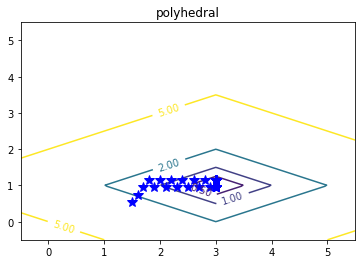

In [18]:
from plotLib import *
%matplotlib inline


##### comparison
level_points_plot( pb5.f , x_tab , pb5.x1_min,pb5.x1_max,pb5.x2_min,pb5.x2_max,pb5.nb_points, pb5.levels , pb5.title )
#level_points_plot( pb5.f , xa_tab , pb5.x1_min,pb5.x1_max,pb5.x2_min,pb5.x2_max,pb5.nb_points, pb5.levels , pb5.title )
#level_2points_plot( pb5.f , x_tab , xa_tab ,  pb5.x1_min, pb5.x1_max, pb5.x2_min, pb5.x2_max, pb5.nb_points,  pb5.levels ,  pb5.title )

> What would you do to minimize polyhedral functions with interval constraints ?

# Appendix: <a id="pbs">Problems</a>

The problems we consider in this second lab are minimizations continous functions with positivity and interval constraints using the projected gradients. The functions are identical to the functions froms teh first lab.

We will consider positive constraints $x\ge0$, i.e., $ x_1 \ge 0 $ and $ x_2 \ge 0 $, in particular, in "pb21" (adapted from "pb1" of lab 1) and in "pb4".

We will also test the optimization of these functions with interval constraints of the type $ a_1 \le x_1 \le b_1 $ and  $ a_2 \le x_2 \le b_2 $, where $a_i, b_i, i=1,2$, are floats designing the interval bounds. 


> **1.** <a id="pb21">`problem1`</a> features a simple quadratic function
$$\begin{array}{rrcll}
f: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & 4 (x_1-3)^2 + 2(x_2 + 0.5)^2
\end{array}$$
<center><img src="Fig/1.png" width="50%"></center>


> **2.** <a id="pb2">`problem2`</a> features a more involved but very smooth function
$$\begin{array}{rrcll}
g: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & \log( 1 + \exp(4 (x_1-3)^2 ) + \exp( 2(x_2-1)^2 ) ) - \log(3)
\end{array}$$
<center><img src="Fig/2.png" width="50%"></center>


> **3.** <a id="pb3">`problem3`</a> features Rosenbrock's smooth but non-convex function
$$\begin{array}{rrcll}
r: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  &  (1-x_1)^2 + 100(x_2-x_1^2)^2
\end{array}$$
<center><img src="Fig/3.png" width="50%"></center>


> **4.** <a id="pb4">`problem4`</a> features a smooth function with two distinct minimizers
$$\begin{array}{rrcll}
t: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  & (0.6 x_1 + 0.2 x_2)^2 \left((0.6 x_1 + 0.2 x_2)^2 - 4 (0.6 x_1 + 0.2 x_2)+4\right) + (-0.2 x_1 + 0.6 x_2)^2
\end{array}$$
<center><img src="Fig/4.png" width="50%"></center>


> **5.** <a id="pb5">`problem5`</a> features a polyhedral function
$$\begin{array}{rrcll}
p: & \mathbb{R}^2 & \to &\mathbb{R}\\
& (x_1,x_2) & \mapsto  &  \left| x_1-3 \right|  + 2\left| x_2-1\right| .
\end{array}$$
<center><img src="Fig/5.png" width="50%"></center>

